# DATA ANALYSIS AND PREDICTION OF LIFE EXPECTANCY FOR 193 COUNTRIES (2000-2015), WHO

# * Import Required Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

# * Load Dataset

In [11]:
data = pd.read_csv("data/LifeExpectancyData.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# * Data Understanding & Exploration

In [14]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [16]:
data.shape

(2938, 22)

In [18]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [20]:
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
data["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [24]:
data["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

# * Data Preprocessing

In [26]:
lb=LabelEncoder()
data["Country"]=lb.fit_transform(data[["Country"]])
data["Status"]=lb.fit_transform(data[["Status"]])
data

C:\Users\PONNU\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PONNU\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [28]:
data["Country"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [30]:
data["Status"].unique()

array([1, 0])

In [32]:
data["Life expectancy "]=data["Life expectancy "].fillna(0)
data["Adult Mortality"]=data["Adult Mortality"].fillna(0.0)
data["Alcohol"]=data["Alcohol"].fillna(0)
data["Hepatitis B"]=data["Hepatitis B"].fillna(0)
data[" BMI "]=data[" BMI "].fillna(0)
data["Polio"]=data["Polio"].fillna(0)
data["Total expenditure"]=data["Total expenditure"].fillna(0)
data["Diphtheria "]=data["Diphtheria "].fillna(0)
data["GDP"]=data["GDP"].fillna(0)
data["Population"]=data["Population"].fillna(0)
data[" thinness  1-19 years"]=data[" thinness  1-19 years"].fillna(0)
data[" thinness 5-9 years"]=data[" thinness 5-9 years"].fillna(0)
data["Income composition of resources"]=data["Income composition of resources"].fillna(0)
data["Schooling"]=data["Schooling"].fillna(0)
data


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# * Feature Selection & Target Definition

In [34]:
x=data.drop(["Life expectancy "],axis=1)
y=data["Life expectancy "]

In [36]:
x

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [38]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

# * Train-Test Split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)

In [42]:
x_train

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1544,98,2009,0,76.0,0,11.42,2052.393076,95.0,0,58.8,...,96.0,8.11,99.0,0.1,13198.669300,497783.0,0.9,0.9,0.888,13.5
521,31,2006,1,56.0,17,1.54,46.901179,0.0,3,18.6,...,47.0,3.99,51.0,10.0,347.673678,421758.0,9.6,9.6,0.323,6.0
2703,177,2009,1,215.0,6,2.35,37.884661,97.0,0,43.4,...,97.0,1.88,96.0,0.1,436.459223,5795.0,3.2,3.3,0.000,10.5
1792,115,2003,1,231.0,69,0.40,3.824212,8.0,830,15.2,...,86.0,1.97,78.0,0.5,219.782326,47624894.0,13.3,13.6,0.445,7.7
1061,68,2012,1,189.0,11,2.02,484.718789,96.0,0,48.6,...,94.0,6.33,96.0,0.4,3299.651390,1527156.0,1.2,1.2,0.616,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,118,2014,1,158.0,18,0.01,8.523486,92.0,1279,18.5,...,92.0,5.80,92.0,0.1,76.238698,28323241.0,15.9,16.3,0.551,12.4
1428,91,2013,1,23.0,9,0.01,0.000000,87.0,71,2.1,...,86.0,2.00,87.0,0.3,0.000000,0.0,9.0,9.1,0.563,10.4
2441,161,2015,1,138.0,3,0.00,0.000000,99.0,1568,23.4,...,99.0,0.00,99.0,0.1,3844.891230,2966.0,15.1,15.0,0.764,14.0
271,16,2000,1,196.0,0,4.79,219.023984,76.0,0,4.8,...,91.0,3.98,91.0,0.3,3364.423711,247315.0,3.8,3.7,0.668,11.7


In [44]:
y_train

1544    83.0
521     46.3
2703    65.6
1792    63.2
1061    71.3
        ... 
1814    69.6
1428    64.9
2441    74.9
271     68.3
2522    83.2
Name: Life expectancy , Length: 2203, dtype: float64

# * Model Training

In [46]:
# LinearRegression

model1=LinearRegression()


In [48]:
model1.fit(x_train,y_train)

LinearRegression()

In [50]:
model1.score(x_test,y_test)

0.7613997812879487

In [52]:
# Decision Tree Regression

model2=DecisionTreeRegressor()

In [54]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
model2.score(x_test,y_test)

0.9077443116082288

In [58]:
# Random Forest Regression

model3=RandomForestRegressor(n_estimators=10)
model4=RandomForestRegressor(n_estimators=20)

In [60]:
model3.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [62]:
model4.fit(x_train,y_train)

RandomForestRegressor(n_estimators=20)

In [64]:
model3.score(x_test,y_test)

0.9534473274510911

In [66]:
model4.score(x_test,y_test)

0.956992075441006

In [68]:
# KNN

model5=KNeighborsRegressor(n_neighbors=5)
model6=KNeighborsRegressor(n_neighbors=7)

In [70]:
model5.fit(x_train,y_train)

KNeighborsRegressor()

In [72]:
model6.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [74]:
model5.score(x_test,y_test)

0.0609922290472501

In [76]:
model6.score(x_test,y_test)

0.11877079369382448

In [78]:
# SVM

model7=SVR(kernel="linear",C=2,gamma="auto")
model8=SVR(kernel="poly",degree=5,C=3,gamma="scale")

In [80]:
# model7.fit(x_train,y_train)

In [82]:
# model8.fit(x_train,y_train)

In [ ]:
# Select best model (Random Forest with ~95%).

# * Prediction using Best Model

In [84]:
y_pred=model4.predict(x_test)
y_pred

array([73.445, 73.42 , 50.43 , 62.965, 71.435, 82.715, 59.525, 75.575,
       71.495, 68.815, 63.665, 55.57 , 74.78 , 60.53 , 80.62 , 66.095,
       79.745, 71.31 , 76.67 , 68.215, 66.47 , 73.32 , 82.91 , 62.645,
       62.985, 50.305, 72.735, 69.465, 74.895, 74.235, 54.815, 62.33 ,
       54.395, 72.03 , 70.66 , 53.97 , 79.675, 61.445, 67.13 , 74.54 ,
       71.205, 52.345, 55.95 , 71.93 , 52.345, 71.19 , 51.22 , 71.005,
       66.47 , 56.995, 73.71 , 63.855, 73.77 , 59.345, 57.07 , 58.04 ,
       52.87 , 73.86 , 72.24 , 68.81 , 62.55 , 46.42 , 54.695, 75.015,
       77.365, 74.05 , 62.16 , 77.335, 68.725, 57.68 , 75.36 , 74.76 ,
       57.6  , 82.1  , 72.6  , 62.755, 67.17 , 73.52 , 70.345, 72.78 ,
       73.515, 83.03 , 75.265, 70.89 , 51.345, 72.83 , 77.77 , 73.9  ,
       73.5  , 58.21 , 72.375, 75.69 , 55.975, 79.83 , 71.925, 77.76 ,
       53.335, 71.645, 67.985, 73.935, 62.86 , 82.33 , 60.49 , 63.9  ,
       73.29 , 64.84 , 70.81 , 46.855, 77.4  , 67.87 , 73.235, 65.065,
      

# * Visualization of Results

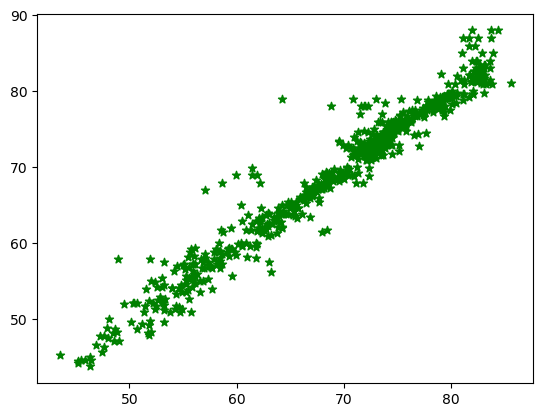

In [86]:
plt.scatter(y_pred,y_test,color="green",marker="*")
plt.show()

In [88]:
pd.DataFrame({"True":y_test,"Predicted":y_pred})

,True,Predicted
2868,73.6,73.445
2128,72.5,73.420
1477,52.2,50.430
1561,62.3,62.965
2872,72.5,71.435
...,...,...
1461,75.0,74.790
1848,81.1,83.185
1063,77.0,73.610
2626,55.7,56.105


In [44]:
model4.predict([[0,2024,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1]])

C:\Users\PONNU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([64.125])

In [45]:
a=int(input("Enter the Country: "))
b=int(input("Enter the Year: " ))
c=int(input("Enter the Status: "))
d=float(input("Enter the Adult Mortality: "))
e=int(input("Enter the Infant Deaths: "))
f=float(input("Enter the Alcohol: "))
g=float(input("Enter the Percentage: "))
h=float(input("Enter the Hepatitis B: "))
i=int(input("Enter the Measles: "))
j=float(input("Enter the BMI: "))
k=int(input("Enter the under-five: "))
l=float(input("Enter the Polio: "))
m=float(input("Enter the Total Expenditure: "))
n=float(input("Enter the Diphtheria: "))
o=float(input("Enter the HIV/AIDS: "))
p=float(input("Enter the GDP: "))
q=float(input("Enter the Population: "))
r=float(input("Enter the thinness 1-19 years: "))
s=float(input("Enter the thinness 5-9 years: "))
t=float(input("Enter the Income composition of resources: "))
u=float(input("Enter the Schooling: "))

Enter the Country:  165
Enter the Year:  2025
Enter the Status:  1
Enter the Adult Mortality:  56
Enter the Infant Deaths:  12
Enter the Alcohol:  0.49
Enter the Percentage:  46.901
Enter the Hepatitis B:  96
Enter the Measles:  0
Enter the BMI:  50.0
Enter the under-five:  55
Enter the Polio:  92.0
Enter the Total Expenditure:  5.80
Enter the Diphtheria:  65.0
Enter the HIV/AIDS:  32.5
Enter the GDP:  76.238
Enter the Population:  5795.0
Enter the thinness 1-19 years:  1.2
Enter the thinness 5-9 years:  1.2
Enter the Income composition of resources:  0.563
Enter the Schooling:  10.4


In [97]:
prediction=model4.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u]])
prediction

C:\Users\PONNU\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([60.415])

In [90]:
# For visualization create a data "results" with columns "Country" "Year" "Actual_Life_Expectancy" "Predicted_Life_Expectancy"


results = pd.DataFrame({
    "Country": x_test["Country"],
    "Year": x_test["Year"],
    "Actual_Life_Expectancy": y_test,
    "Predicted_Life_Expectancy": y_pred
})

# Save to CSV
results.to_csv("life_expectancy_predictions.csv", index=False)


In [96]:
results

,Country,Year,Actual_Life_Expectancy,Predicted_Life_Expectancy
2868,188,2005,73.6,73.445
2128,139,2006,72.5,73.420
1477,94,2012,52.2,50.430
1561,99,2008,62.3,62.965
2872,188,2001,72.5,71.435
...,...,...,...,...
1461,93,2012,75.0,74.790
1848,120,2012,81.1,83.185
1063,68,2010,77.0,73.610
2626,172,2006,55.7,56.105


In [104]:
life_pred=pd.read_csv("data/LifeExpectancyData.csv") # loaded becoz data had country column in numbers
life_pred

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [106]:
results["Country"]=life_pred["Country"].astype(str)  # changed country column of results data to str

In [108]:
results

,Country,Year,Actual_Life_Expectancy,Predicted_Life_Expectancy
2868,Venezuela (Bolivarian Republic of),2005,73.6,73.445
2128,Romania,2006,72.5,73.420
1477,Lesotho,2012,52.2,50.430
1561,Madagascar,2008,62.3,62.965
2872,Venezuela (Bolivarian Republic of),2001,72.5,71.435
...,...,...,...,...
1461,Lebanon,2012,75.0,74.790
1848,New Zealand,2012,81.1,83.185
1063,Guatemala,2010,77.0,73.610
2626,Togo,2006,55.7,56.105


In [110]:
results.to_csv("life_expectancy_pred.csv", index=False)